# Demo
This demonstaration gives an example of a star calculations and plots that can be performed using the code. 
Then, it demonstrates how a star is evolved in time using Barraffe et. al. (2015) evolutionary tracks, and how the period evolves throughout the star's lifetime. It also described how the evolution is affected by changing free parameters in the model.

Firstly import the packages necessary and set the values of physical constants used (in cgs units).

In [1]:
import numpy as np
import mpmath as mp
import time
import pandas as pd
from mpmath import lambertw
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
from scipy.integrate import quad
from mpmath.calculus.optimization import Secant
import os

# PHYSICAL CONSTANTS USED CGS UNITS
M_sun = 1.99e33 # Solar mass
R_sun = 6.96e10 # Solar radius
G = 6.673e-8 # Gravitational constant
k = 1.38e-16 # Boltzmann constant
T = 1e6 # Assume constant coronal temperature of 10^6 K
m_H = 1.673e-24 # Hydrogen mass
R_J = 7.14e9 # Jupyter radius
mu = 1.0 # mean molecular weight
cs = np.sqrt(3*k*T/(mu*m_H)) # Sound speed
number_density = 1e10 # number density at the coronal base

# SET ARBITRARY PRECISION
mp.mp.dps = 50 

import warnings
warnings.filterwarnings('ignore')

## Star Processes Calculations

Import the STAR class from the code to intialise a star.

In [2]:
from Evolution import Star

As an example let's initialise a star with mass = 0.3M_sun, radius = 0.5M_sun, a rotation period of 10 days and magnetic field strength at poles of 1000 Gauss.

In [3]:
S = Star(0.3*M_sun, 0.5*R_sun, 10, 1000)

We can find the colatitude of the last open fieldline, $S = sin^2(theta)$. The fieldlines with smaller colatitudes are open (radial) beyond the Alfven point, while fieldlines with larger colatitudes are closed (dipolar).
We can plot the field.

Last open fieldline, S = 0.10933351530728929200982610843407136391186332454437


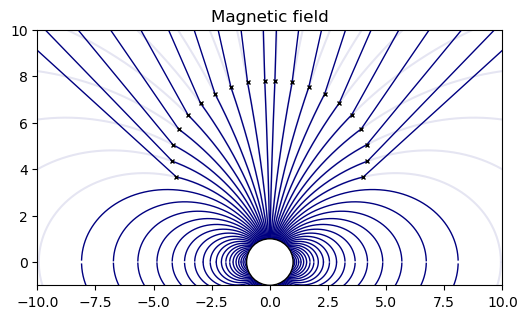

In [4]:
fig, ax = plt.subplots(dpi = 100)
S.plot_field(ax, 10)
ax.set_title('Magnetic field')

print(r'Last open fieldline, S =', S.last_fieldline)

We can plot the shape of the Alfven surface $x_c(S)$ and fit a 9th-order polynomial to surface. Additionally, we fit a 9th-order polynomial to the function $\rho_c v_c(S)$ (density at the critical point $\times$ the Alfven velocity), in order to determine the mass outflow.

We also set the resolution (number of fieldlines to use). For reference, the top of the plot shows the calculate values of energy ratios for the star.

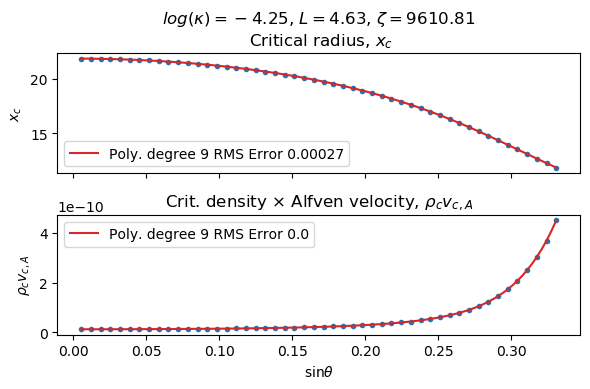

In [8]:
num = 50
S.plot_poly_fits(50)

Now, we can determine the total mass and angular momentum outflow from the star along all fieldlines. We use 
$\dot{M} = \int\limits_0^{S_m} \Delta \dot{M} =  4\pi R^2 \int\limits_0^{\sqrt{S_m}} \rho_c v_c t \frac{P(t) + \frac{1}{2}tP'(t)}{\sqrt{1-\frac{3}{4}t^2}} dt$, where $S_m$ is colatitude of the last open fieldline.

We carry out this numerical integration numerically

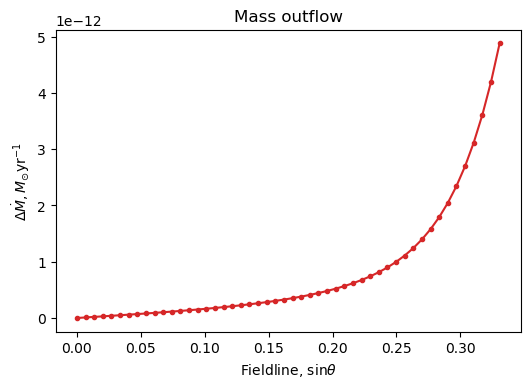

In [9]:
S.plot_delta_M(num)

## Evolution of the star